In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import statsmodels.api as sm

In [4]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


## Task 4

### 1) For the "Median value of owner-occupied homes" provide a boxplot

c:\Users\n1603499\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


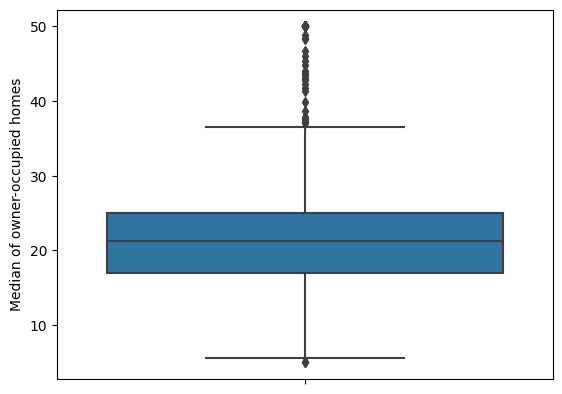

In [5]:
plot01 = sns.boxplot(y = boston_df.MEDV )
plot01.set(ylabel = "Median of owner-occupied homes")
# sns.violinplot(y = boston_df.MEDV )
plt.show()

---

### 2) Provide a  bar plot for the Charles river variable

c:\Users\n1603499\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\n1603499\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\n1603499\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


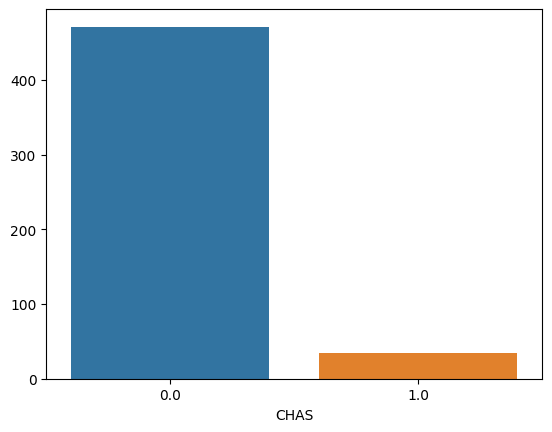

In [6]:
plot02 = sns.countplot(x = "CHAS", data= boston_df)
plot02.set(ylabel="")
plt.show()

---

### 3) Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

In [7]:
age_groups = [0, 36, 70, float('inf')] # Assuming the maximum age is 120
age_labels = ['35 years and younger', 'between 35 and 70', '70 years and older']

# Use cut to create the new column named 'AGE_G1'
boston_df['AGE_G1'] = pd.cut(boston_df['AGE'], bins=age_groups, labels=age_labels)

c:\Users\n1603499\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\n1603499\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


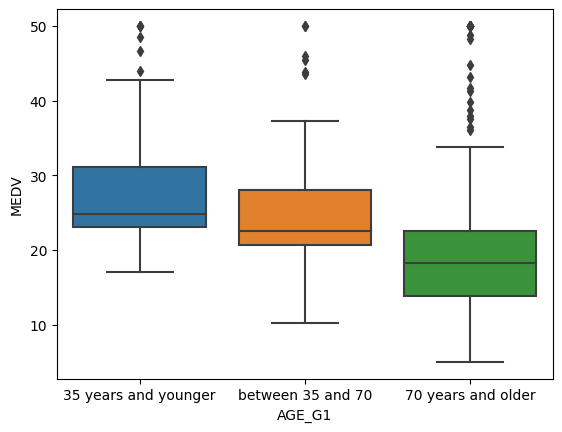

In [8]:
plot03 = sns.boxplot(x=boston_df.AGE_G1, y = boston_df.MEDV)
plt.show()

---

### 4) Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?

c:\Users\n1603499\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\n1603499\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


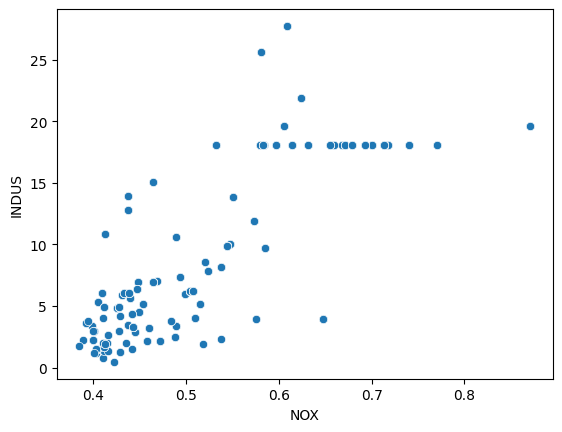

In [9]:
plot04 = sns.scatterplot(x=boston_df.NOX, y = boston_df.INDUS)
plt.show()

---

### 5) Create a histogram for the pupil to teacher ratio variable

c:\Users\n1603499\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\n1603499\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


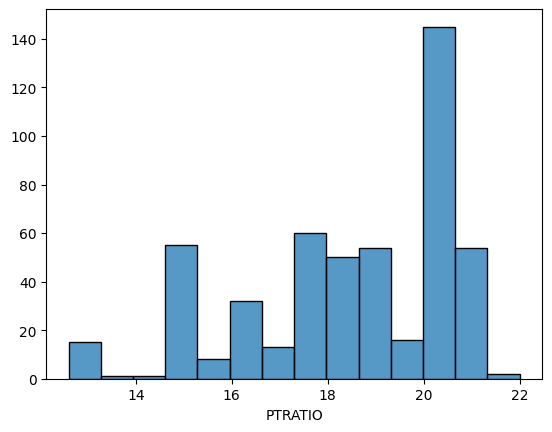

In [10]:
plot05 = sns.histplot(x=boston_df.PTRATIO)
plot05.set(ylabel="")
plt.show()

---

## Task 5


---


### 1) Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)


State the hypothesis
* $H_0: µ_1 = µ_2$ ("there is no difference in median value of houses bounded by the Charles river  or not")
* $H_1: µ_1 ≠ µ_2$ ("there is a difference in median value of houses bounded by the Charles river  or not"")


In [10]:
scipy.stats.levene(boston_df[boston_df['CHAS'] == 0]['MEDV'],
                   boston_df[boston_df['CHAS'] == 1]['MEDV'], center='mean')

# since the p-value is less than 0.05 we can assume inequality of variance

LeveneResult(statistic=8.75190489604598, pvalue=0.003238119367639829)

Use the <code>ttest_ind</code> from the <code>scipy_stats</code> library


In [7]:
scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 0]['MEDV'],
                   boston_df[boston_df['CHAS'] == 1]['MEDV'], equal_var = False)

TtestResult(statistic=-3.113291312794837, pvalue=0.003567170098137517, df=36.876408797611994)

**Conclusion:** Since the p-value is less than alpha value 0.05, we reject the null hypothesis as there is enough proof that there is a statistical difference in median value of houses bounded by the Charles river  or not


---

### 2) Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)


* 35 years and younger
* between 35 and 70
* 70 years and older

In [5]:
age_groups = [0, 36, 70, float('inf')] # Assuming the maximum age is 120
age_labels = ['35 years and younger', 'between 35 and 70', '70 years and older']

# Use qcut to create the new column named 'AGE_G1'
boston_df['AGE_G1'] = pd.cut(boston_df['AGE'], bins=age_groups, labels=age_labels)

In [6]:
age_group = []
age_group.append(boston_df[boston_df['AGE_G1'] == '35 years and younger']['MEDV'])
age_group.append(boston_df[boston_df['AGE_G1'] == 'between 35 and 70']['MEDV'])
age_group.append(boston_df[boston_df['AGE_G1'] == '70 years and older']['MEDV'])


State the hypothesis
* $H_0: µ_1 = µ_2 = µ_3$ (the three population means are equal)
* $H_1:$ At least one of the means differ


Test for equality of variance


In [7]:
scipy.stats.levene(age_group[0],
                   age_group[1], 
                   age_group[2], 
                   center='mean')

LeveneResult(statistic=2.5596032320925737, pvalue=0.0783424287358102)

Now, run a one-way ANOVA.


In [15]:
f_statistic, p_value = scipy.stats.f_oneway(age_group[0], age_group[1], age_group[2])
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

F_Statistic: 36.24037196230701, P-Value: 1.9797163076707407e-15


**Conclusion:** Since the p-value is less than 0.05, we will reject the null hypothesis as there is significant evidence that at least one of the means differ.


---

### 3) Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

State the hypothesis:
* $H_0:$ (The proportion of non-retail business acres per town) is not correlated with (Nitric oxide concentrations)
* $H_1:$ (The proportion of non-retail business acres per town) is correlated with  (Nitric oxide concentrations)


c:\Users\n1603499\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\n1603499\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


[Text(0, 0.5, 'proportion of non-retail business acres per town')]

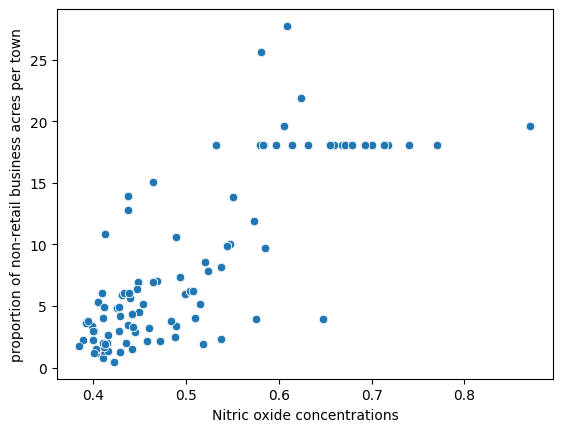

In [11]:
ax = sns.scatterplot(x="NOX", y="INDUS", data=boston_df)
ax.set(xlabel = "Nitric oxide concentrations" )
ax.set(ylabel = "proportion of non-retail business acres per town" )

In [9]:
scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

PearsonRResult(statistic=0.7636514469209158, pvalue=7.91336106123623e-98)

**Conclusion:** Since the p-value  (Sig. (2-tailed)  < 0.05, we reject  the Null hypothesis and conclude that there  exists a relationship (The proportion of non-retail business acres per town) {NOX} and (proportion of non-retail business acres per town) {INDUS}


---

### 4) What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)


c:\Users\n1603499\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\n1603499\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


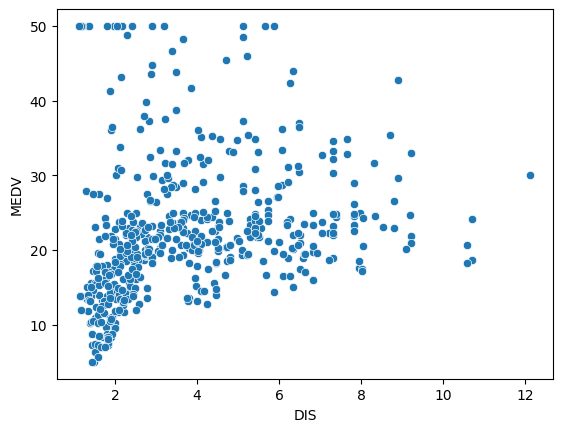

In [16]:
ax = sns.scatterplot(x='DIS', y='MEDV', data=boston_df)

In [21]:
X = boston_df['DIS']
y = boston_df['MEDV']
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# # Print out the statistics
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Mon, 04 Sep 2023   Prob (F-statistic):           1.21e-08
Time:                        11:20:00   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.0

(An additional weighted distance  to the five Boston employment centres) will increase the predicted median value of owner occupied homes by $ 1091.6 